# ANALYSIS ON NATIONALITY AND GRAMMYS WINNING

In [18]:
import pandas as pd
artists_df= pd.read_csv("artists_data_FINAL.csv")
grammys_df= pd.read_csv("grammys_data_FINAL.csv")

In [19]:
artists_df #2305 rows × 13 columns

,ArtistID,Main Artist,Spotify Found,Full Name,Country,Birth Date,Group Members,Found Wiki,Wiki URL,Gender,Cleaned Main Artist,US State,State ID
0,A0,Aerosmith,1.0,NaN,United States,NaN,5.0,1,https://en.wikipedia.org/wiki/Aerosmith,NaN,Aerosmith,Massachusetts,MA
1,A1,Monica,1.0,Monica Denise Arnold,United States,1980-10-24,1.0,1,https://en.wikipedia.org/wiki/Monica_(singer),F,Monica,Georgia,GA
2,A2,Jennifer Paige,1.0,NaN,United States,1973-09-03,1.0,1,https://en.wikipedia.org/wiki/Jennifer_Paige,F,Jennifer Paige,Georgia,GA
3,A3,Usher,1.0,Usher Raymond IV[1][2],United States,1978-10-14,1.0,1,https://en.wikipedia.org/wiki/Usher_(musician),M,Usher,Texas,TX
4,A4,Brandy,1.0,Brandy Rayana Norwood,United States,1979-02-11,1.0,1,https://en.wikipedia.org/wiki/Brandy_Norwood,F,Brandy,Mississippi,MS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,A2300,Steely Dan,0.0,NaN,United States,NaN,13.0,1,https://en.wikipedia.org/wiki/Steely_Dan,NaN,Steely Dan,New York,NY
2301,A2301,Paul Simon,0.0,NaN,United States,1941-10-13,1.0,1,https://en.wikipedia.org/wiki/Paul_Simon,M,Paul Simon,New York,NY
2302,A2302,Shelby Lynne,0.0,NaN,United States,1968-10-22,1.0,1,https://en.wikipedia.org/wiki/Shelby_Lynne,F,Shelby Lynne,Virginia,VA
2303,A2303,JT,0.0,Jatavia Shakara Johnson,United States,1992-12-03,1.0,1,https://en.wikipedia.org/wiki/JT_(rapper),F,Jt,Florida,FL


In [4]:
grammys_df

,Grammy,Year,Category,Main Artist,Artist,Cleaned Song or Album,Song or Album,Win,Cleaned Main Artist,Wiki URL,ArtistID,Song ID
0,67,2024,Record Of The Year,Kendrick Lamar,Kendrick Lamar,Not Like Us,Not Like Us,1,Kendrick Lamar,https://en.wikipedia.org/wiki/Kendrick_Lamar,A1382,S133800
1,67,2024,Record Of The Year,Taylor Swift,Taylor Swift Featuring Post Malone,Fortnight,Fortnight,0,Taylor Swift,https://en.wikipedia.org/wiki/Taylor_Swift,A967,S133600
2,67,2024,Record Of The Year,Chappell Roan,Chappell Roan,Good Luck Babe!,"Good Luck, Babe!",0,Chappell Roan,https://en.wikipedia.org/wiki/Chappell_Roan,A2223,S133476
3,67,2024,Record Of The Year,Billie Eilish,Billie Eilish,Birds Of A Feather,BIRDS OF A FEATHER,0,Billie Eilish,https://en.wikipedia.org/wiki/Billie_Eilish,A1833,S134012
4,67,2024,Record Of The Year,Charli Xcx,Charli xcx,360,360,0,Charli Xcx,https://en.wikipedia.org/wiki/Charli_XCX,A1524,S134372
...,...,...,...,...,...,...,...,...,...,...,...,...
408,43,2000,Song Of The Year,U2,U2,Beautiful Day,Beautiful Day,1,U2,https://en.wikipedia.org/wiki/U2,A166,S10674
409,43,2000,Song Of The Year,Destiny'S Child,Destiny's Child,Say My Name,Say My Name,0,Destinys Child,NaN,A270,S6582
410,43,2000,Song Of The Year,Macy Gray,Macy Gray,I Try,I Try,0,Macy Gray,https://en.wikipedia.org/wiki/Macy_Gray,A352,S7367
411,43,2000,Song Of The Year,Lee Ann Womack,Lee Ann Womack,I Hope You Dance,I Hope You Dance,0,Lee Ann Womack,https://en.wikipedia.org/wiki/Lee_Ann_Womack,A109,S8582


In [6]:
# artists_df = artists_df.merge(grammys_df[['ArtistID', 'Win']], on='ArtistID', how='left')

In [20]:
wins_per_artist = grammys_df.groupby('ArtistID')['Win'].sum().reset_index() # count number of wins for each artist
artists_df = artists_df.merge(
    wins_per_artist.rename(columns={'Win': 'nb wins'}),
    on='ArtistID',
    how='left')
artists_df

,ArtistID,Main Artist,Spotify Found,Full Name,Country,Birth Date,Group Members,Found Wiki,Wiki URL,Gender,Cleaned Main Artist,US State,State ID,nb wins
0,A0,Aerosmith,1.0,NaN,United States,NaN,5.0,1,https://en.wikipedia.org/wiki/Aerosmith,NaN,Aerosmith,Massachusetts,MA,NaN
1,A1,Monica,1.0,Monica Denise Arnold,United States,1980-10-24,1.0,1,https://en.wikipedia.org/wiki/Monica_(singer),F,Monica,Georgia,GA,NaN
2,A2,Jennifer Paige,1.0,NaN,United States,1973-09-03,1.0,1,https://en.wikipedia.org/wiki/Jennifer_Paige,F,Jennifer Paige,Georgia,GA,NaN
3,A3,Usher,1.0,Usher Raymond IV[1][2],United States,1978-10-14,1.0,1,https://en.wikipedia.org/wiki/Usher_(musician),M,Usher,Texas,TX,0.0
4,A4,Brandy,1.0,Brandy Rayana Norwood,United States,1979-02-11,1.0,1,https://en.wikipedia.org/wiki/Brandy_Norwood,F,Brandy,Mississippi,MS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,A2300,Steely Dan,0.0,NaN,United States,NaN,13.0,1,https://en.wikipedia.org/wiki/Steely_Dan,NaN,Steely Dan,New York,NY,NaN
2301,A2301,Paul Simon,0.0,NaN,United States,1941-10-13,1.0,1,https://en.wikipedia.org/wiki/Paul_Simon,M,Paul Simon,New York,NY,NaN
2302,A2302,Shelby Lynne,0.0,NaN,United States,1968-10-22,1.0,1,https://en.wikipedia.org/wiki/Shelby_Lynne,F,Shelby Lynne,Virginia,VA,NaN
2303,A2303,JT,0.0,Jatavia Shakara Johnson,United States,1992-12-03,1.0,1,https://en.wikipedia.org/wiki/JT_(rapper),F,Jt,Florida,FL,NaN


In [21]:
artists_df['nb wins'] = artists_df['nb wins'].fillna(-1).astype(int)


In [22]:
nominations_per_artist = grammys_df.groupby('ArtistID').size().reset_index(name='nb nominations')

artists_df = artists_df.merge(
    nominations_per_artist,
    on='ArtistID',
    how='left'
)

artists_df['nb nominations'] = artists_df['nb nominations'].fillna(0).astype(int)



In [23]:
artists_df#2305 rows × 15 columns

,ArtistID,Main Artist,Spotify Found,Full Name,Country,Birth Date,Group Members,Found Wiki,Wiki URL,Gender,Cleaned Main Artist,US State,State ID,nb wins,nb nominations
0,A0,Aerosmith,1.0,NaN,United States,NaN,5.0,1,https://en.wikipedia.org/wiki/Aerosmith,NaN,Aerosmith,Massachusetts,MA,-1,0
1,A1,Monica,1.0,Monica Denise Arnold,United States,1980-10-24,1.0,1,https://en.wikipedia.org/wiki/Monica_(singer),F,Monica,Georgia,GA,-1,0
2,A2,Jennifer Paige,1.0,NaN,United States,1973-09-03,1.0,1,https://en.wikipedia.org/wiki/Jennifer_Paige,F,Jennifer Paige,Georgia,GA,-1,0
3,A3,Usher,1.0,Usher Raymond IV[1][2],United States,1978-10-14,1.0,1,https://en.wikipedia.org/wiki/Usher_(musician),M,Usher,Texas,TX,0,1
4,A4,Brandy,1.0,Brandy Rayana Norwood,United States,1979-02-11,1.0,1,https://en.wikipedia.org/wiki/Brandy_Norwood,F,Brandy,Mississippi,MS,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,A2300,Steely Dan,0.0,NaN,United States,NaN,13.0,1,https://en.wikipedia.org/wiki/Steely_Dan,NaN,Steely Dan,New York,NY,-1,0
2301,A2301,Paul Simon,0.0,NaN,United States,1941-10-13,1.0,1,https://en.wikipedia.org/wiki/Paul_Simon,M,Paul Simon,New York,NY,-1,0
2302,A2302,Shelby Lynne,0.0,NaN,United States,1968-10-22,1.0,1,https://en.wikipedia.org/wiki/Shelby_Lynne,F,Shelby Lynne,Virginia,VA,-1,0
2303,A2303,JT,0.0,Jatavia Shakara Johnson,United States,1992-12-03,1.0,1,https://en.wikipedia.org/wiki/JT_(rapper),F,Jt,Florida,FL,-1,0


In [24]:
artists_df["win rate"] = artists_df.apply(lambda row: row["nb wins"] / row["nb nominations"] if row["nb nominations"] != 0 else None,axis=1)



In [25]:
artists_df #2305 rows × 16 columns

,ArtistID,Main Artist,Spotify Found,Full Name,Country,Birth Date,Group Members,Found Wiki,Wiki URL,Gender,Cleaned Main Artist,US State,State ID,nb wins,nb nominations,win rate
0,A0,Aerosmith,1.0,NaN,United States,NaN,5.0,1,https://en.wikipedia.org/wiki/Aerosmith,NaN,Aerosmith,Massachusetts,MA,-1,0,NaN
1,A1,Monica,1.0,Monica Denise Arnold,United States,1980-10-24,1.0,1,https://en.wikipedia.org/wiki/Monica_(singer),F,Monica,Georgia,GA,-1,0,NaN
2,A2,Jennifer Paige,1.0,NaN,United States,1973-09-03,1.0,1,https://en.wikipedia.org/wiki/Jennifer_Paige,F,Jennifer Paige,Georgia,GA,-1,0,NaN
3,A3,Usher,1.0,Usher Raymond IV[1][2],United States,1978-10-14,1.0,1,https://en.wikipedia.org/wiki/Usher_(musician),M,Usher,Texas,TX,0,1,0.0
4,A4,Brandy,1.0,Brandy Rayana Norwood,United States,1979-02-11,1.0,1,https://en.wikipedia.org/wiki/Brandy_Norwood,F,Brandy,Mississippi,MS,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,A2300,Steely Dan,0.0,NaN,United States,NaN,13.0,1,https://en.wikipedia.org/wiki/Steely_Dan,NaN,Steely Dan,New York,NY,-1,0,NaN
2301,A2301,Paul Simon,0.0,NaN,United States,1941-10-13,1.0,1,https://en.wikipedia.org/wiki/Paul_Simon,M,Paul Simon,New York,NY,-1,0,NaN
2302,A2302,Shelby Lynne,0.0,NaN,United States,1968-10-22,1.0,1,https://en.wikipedia.org/wiki/Shelby_Lynne,F,Shelby Lynne,Virginia,VA,-1,0,NaN
2303,A2303,JT,0.0,Jatavia Shakara Johnson,United States,1992-12-03,1.0,1,https://en.wikipedia.org/wiki/JT_(rapper),F,Jt,Florida,FL,-1,0,NaN


In [26]:
artists_df['nb wins'].value_counts() #number of grammys wins for each artist.

,count
nb wins,
-1,2117
0,147
1,25
2,10
4,3
3,1
5,1
7,1


In [31]:
artists_df['nb nominations'].value_counts()

,count
nb nominations,
0,2117
1,103
2,48
3,15
4,7
14,3
5,3
6,3
9,1


In [29]:
artists_df['win rate'].value_counts(dropna=False) #number of grammys wins for each artist.

,count
win rate,
NaN,2117
0.000000,147
1.000000,18
0.500000,9
0.250000,4
0.666667,2
0.111111,1
0.800000,1
0.214286,1


In [72]:
artists_df=pd.read_csv("artists_data_FINAL_WIN_INDICATOR.csv")

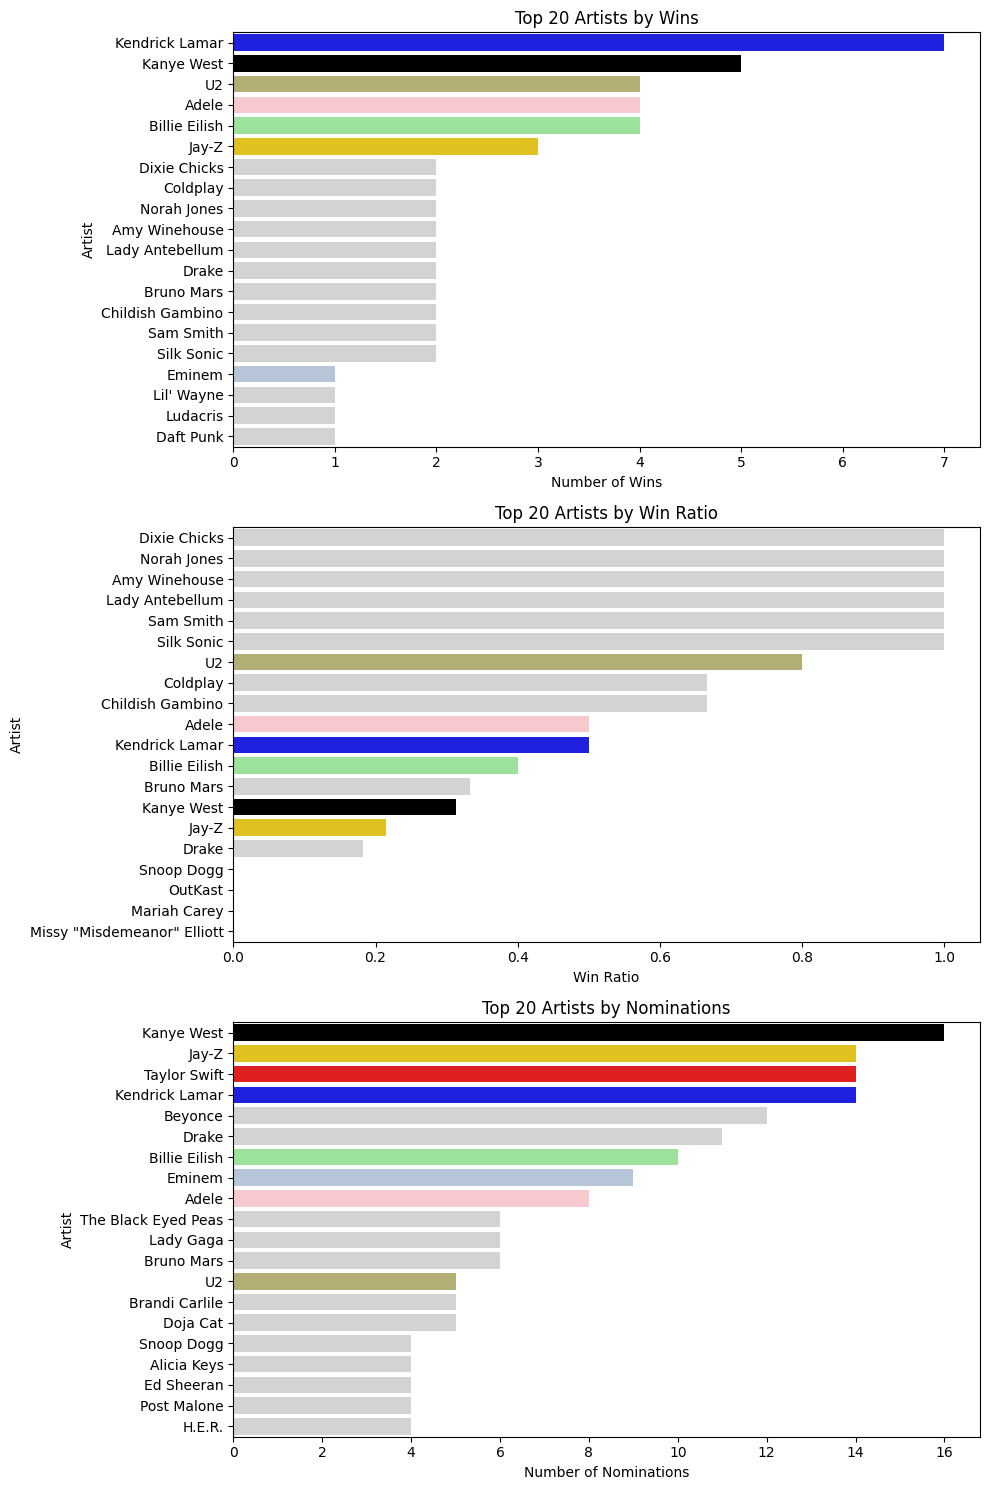

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

artist_colors = {
    'Taylor Swift': 'red',
    'Kanye West': 'black',
    'Billie Eilish': 'lightgreen',
    'Kendrick Lamar': 'blue',
    'U2':"darkkhaki",
    'Adele':"pink",
    'Jay-Z': 'gold',
    'Eminem':'lightsteelblue'
}

default_color = "lightgray"

# Sort data by wins, nominations, and win rate
top_wins = artists_df.nlargest(20, 'nb wins')  # Top 10 artists by wins
top_wins['Color'] = top_wins['Main Artist'].apply(lambda x: artist_colors.get(x, default_color))  # Default color is gray

top_ratio = artists_df[(artists_df['nb wins'] != 1) & (artists_df['nb nominations'] != 1)].nlargest(20, 'win rate')  # Filter for ratio, exclude 1 win and 1 nomination
top_ratio['Color'] = top_ratio['Main Artist'].apply(lambda x: artist_colors.get(x, default_color))  # Default color is gray

top_nominations = artists_df.nlargest(20, 'nb nominations')  # Top 10 artists by nominations
top_nominations['Color'] = top_nominations['Main Artist'].apply(lambda x: artist_colors.get(x,default_color))  # Default color is gray

# Set up the plot figure
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot Top 10 Artists by Wins
sns.barplot(x='nb wins', y='Main Artist', data=top_wins, ax=axes[0], hue='Main Artist', palette=top_wins['Color'].tolist(), legend=False)
axes[0].set_title('Top 20 Artists by Wins')
axes[0].set_xlabel('Number of Wins')
axes[0].set_ylabel('Artist')

# Plot Top 10 Artists by Win Ratio
sns.barplot(x='win rate', y='Main Artist', data=top_ratio, ax=axes[1], hue='Main Artist', palette=top_ratio['Color'].tolist(), legend=False)
axes[1].set_title('Top 20 Artists by Win Ratio')
axes[1].set_xlabel('Win Ratio')
axes[1].set_ylabel('Artist')

# Plot Top 10 Artists by Nominations
sns.barplot(x='nb nominations', y='Main Artist', data=top_nominations, ax=axes[2], hue='Main Artist', palette=top_nominations['Color'].tolist(), legend=False)
axes[2].set_title('Top 20 Artists by Nominations')
axes[2].set_xlabel('Number of Nominations')
axes[2].set_ylabel('Artist')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


In [62]:
pip install plotly

In [89]:
import plotly.express as px
import pandas as pd

# Filter out unwanted rows
filtered_df = artists_df[
    ~((artists_df['nb nominations'] == 1) & (artists_df['nb wins'] == 1)) &
    (artists_df['nb wins'] != -1)
].copy()

# Define custom colors and assign a group for unknown artists
artist_colors = {
    'Taylor Swift': 'red',
    'Kanye West': 'black',
    'Billie Eilish': 'lightgreen',
    'Kendrick Lamar': 'blue',
    'U2': "darkkhaki",
    'Adele': "pink",
    'Jay-Z': 'gold',
    'Eminem': 'lightsteelblue',
    'Drake':'lavenderblush',
    'Beyonce':'thistle'
}
default_color = "lightgray"

# Group unknown artists into one category
filtered_df['Display Artist'] = filtered_df['Main Artist'].apply(
    lambda x: x if x in artist_colors else 'Other'
)

# Add "Other" to the color map
full_color_map = artist_colors.copy()
full_color_map['Other'] = default_color

# Plot
fig = px.scatter(
    filtered_df,
    x='nb nominations',
    y='nb wins',
    color='Display Artist',
    color_discrete_map=full_color_map,
    hover_name='Main Artist',
    title='Nominations vs Wins (Interactive)'
)

# Make dots more visible with darker edges
fig.update_traces(marker=dict(
    size=12,  # Increase size of dots
    line=dict(
        width=2,  # Thickness of border
        color='black'  # Dark color for the edge
    )
))

# Add red dotted line at y = 0
fig.add_shape(
    type="line",
    x0=filtered_df['nb nominations'].min(),
    y0=0,
    x1=filtered_df['nb nominations'].max(),
    y1=0,
    line=dict(color="red", width=2, dash="dot")
)

fig.update_layout(
    xaxis_title='Number of Nominations',
    yaxis_title='Number of Wins',
    height=600
)

fig.show()


In [30]:
artists_df.to_csv("artists_data_FINAL_WIN_INDICATOR.csv")

In [100]:
import pandas as pd

# Filter artists where win rate is 1, nb wins = 1, and nb nominations = 1
artists_win_ratio_1 = artists_df[(artists_df['win rate'] == 1) & (artists_df['nb wins'] == 1) & (artists_df['nb nominations'] == 1)]

# Create a table for artists with win ratio 1, nb wins = 1, and nb nominations = 1
table_win_ratio_1 = artists_win_ratio_1[['Main Artist', 'nb wins', 'nb nominations', 'win rate']]

# Filter artists where win ratio is 0, and they have more than 2 nominations
artists_win_ratio_0_high_nominations = artists_df[(artists_df['win rate'] == 0) & (artists_df['nb nominations'] > 2)]

# Sort this table by 'nb nominations' in descending order
table_win_ratio_0_high_nominations = artists_win_ratio_0_high_nominations[['Main Artist', 'nb wins', 'nb nominations', 'win rate']].sort_values(by='nb nominations', ascending=False)



In [101]:
table_win_ratio_1

,Main Artist,nb wins,nb nominations,win rate
334,Lil' Wayne,1,1,1.0
423,Ludacris,1,1,1.0
461,Daft Punk,1,1,1.0
509,Luther Vandross,1,1,1.0
588,John Mayer,1,1,1.0
642,Killer Mike,1,1,1.0
1344,Gotye,1,1,1.0
1557,Mark Ronson,1,1,1.0
1702,21 Savage,1,1,1.0
2265,Bonnie Raitt,1,1,1.0


In [102]:
table_win_ratio_0_high_nominations

,Main Artist,nb wins,nb nominations,win rate
967,Taylor Swift,0,14,0.0
1115,Lady Gaga,0,6,0.0
480,The Black Eyed Peas,0,6,0.0
1913,Doja Cat,0,5,0.0
1013,Brandi Carlile,0,5,0.0
1628,Post Malone,0,4,0.0
1934,Olivia Rodrigo,0,4,0.0
17,Snoop Dogg,0,4,0.0
285,Mary J. Blige,0,3,0.0
688,T.I.,0,3,0.0
